In [32]:
from cobra.io import read_sbml_model
model = read_sbml_model('iML1515.xml')

In [2]:
for reaction in model.metabolites.gam_e.reactions:
    print(reaction.id, reaction, reaction.name)

GAMtex GAMtex: gam_e <=> gam_p D-glucosamine transport via diffusion (extracellular to periplasm)
EX_gam_e EX_gam_e: gam_e -->  D-Glucosamine exchange


In [3]:
medium = model.medium
with model:
    model.reactions.EX_chtbs_e.lower_bound = -1000.0
    model.reactions.EX_chtbs_e.upper_bound = 1000.0
    model.reactions.EX_gam_e.lower_bound = -1000.0
    model.reactions.EX_gam_e.upper_bound = 1000.0
    medium['EX_chtbs_e'] = 1000
    model.medium = medium
    # model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    model.objective = model.reactions.GAMtex
    solution = model.optimize()
    print(solution.fluxes[solution.fluxes != 0])
    print(solution.fluxes["GAMtex"])
    print(solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])

EX_fe3_e        6.860
ENO             6.860
FBA             3.430
PGI             3.430
PGK            -6.860
EX_fe2_e       -6.860
EX_glc__D_e    -3.430
EX_lac__D_e     6.860
ADK1           -3.430
GAPD            6.860
ADK3            3.430
H2Otex         -3.430
O2tex           1.715
D_LACtex       -6.860
FE2tex          6.860
FEROpp          1.715
FE3tex         -6.860
GLCptspp        3.430
EX_h2o_e        3.430
ATPM            6.860
LDH_D          -6.860
D_LACt2pp      -6.860
PFK             3.430
PGM            -6.860
TPI             3.430
GLCtex_copy2    3.430
EX_o2_e        -1.715
PYK3            3.430
Name: fluxes, dtype: float64
0.0
0.0


# Check genes

In [4]:
genes = ["b0677", "b0678", "b0679", "b1817", "b1818", "b1819", "b1101", "b2415", "b2416", "b2417"]
essentiality = {}
for gene in genes:
    with model:
        model.genes.get_by_id(gene).knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [5]:
essentiality

{'b0677': 0.8769972144269703,
 'b0678': 0.8769972144269653,
 'b0679': 0.8769972144269653,
 'b1817': 0.8769972144269653,
 'b1818': 0.8769972144269653,
 'b1819': 0.8769972144269653,
 'b1101': 0.8769972144269653,
 'b2415': 0.86759302365718,
 'b2416': 0.86759302365718,
 'b2417': 0.8769972144269674}

<AxesSubplot: ylabel='Frequency'>

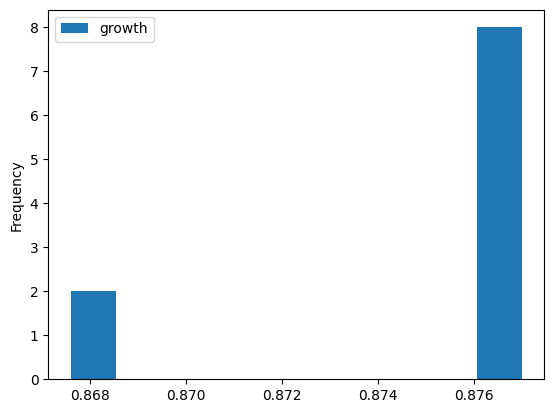

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')
df.plot.hist()

In [28]:
from cobra import Reaction
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
from cobra.flux_analysis import moma
import numpy as np

medium = model.medium
with model:
    # media
    medium['EX_glc__D_e'] = 30
    medium['EX_rib__D_e'] = 10
    medium['EX_chtbs_e'] = 0
    model.medium = medium
    
    # gene knockout
#     model.genes.get_by_id("b0677").knock_out()
#     model.genes.get_by_id("b0678").knock_out()
#     model.genes.get_by_id("b0679").knock_out()
#     model.genes.get_by_id("b1817").knock_out()
#     model.genes.get_by_id("b1818").knock_out()
#     model.genes.get_by_id("b1819").knock_out()
#     model.genes.get_by_id("b1101").knock_out()
#     model.genes.get_by_id("b2415").knock_out()
#     model.genes.get_by_id("b2416").knock_out()
#     model.genes.get_by_id("b2417").knock_out()
    
    # gene integration
    reaction = Reaction("ExRe1")
    reaction.name = "GlcNAc-6-P N-Acetyltransferase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000

    reaction.add_metabolites({
        model.metabolites.get_by_id("accoa_c"): -1.0,
        model.metabolites.get_by_id("gam6p_c"): -1.0,
        model.metabolites.get_by_id("acgam6p_c"): 1.0,
        model.metabolites.get_by_id("coa_c"): 1.0,
        model.metabolites.get_by_id("h_c"): 1.0,
    })
    model.add_reactions([reaction])
#     reaction = Reaction("ExRe2")
#     reaction.name = "GlcNAc-6-P phosphatase"
#     reaction.lower_bound = 0
#     reaction.upper_bound = 1000

#     reaction.add_metabolites({
#         model.metabolites.get_by_id("acgam6p_c"): -1.0,
#         model.metabolites.get_by_id("h2o_p"): -1.0,
#         model.metabolites.get_by_id("pi_p"): 1.0,
#         model.metabolites.get_by_id("acgam_p"): 1.0
#     })
#     model.add_reactions([reaction])

    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.45
    model.objective = model.reactions.ExRe1
    solution = model.optimize()
    loopless = loopless_solution(model)

22.823896531250107
22.823896531250107
0.45
22.823896531249908
22.823896531249908
0.45


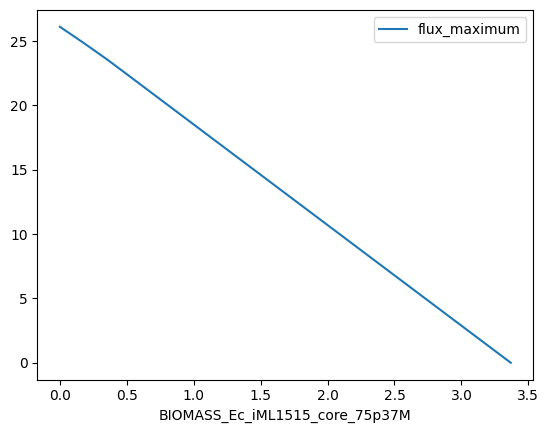

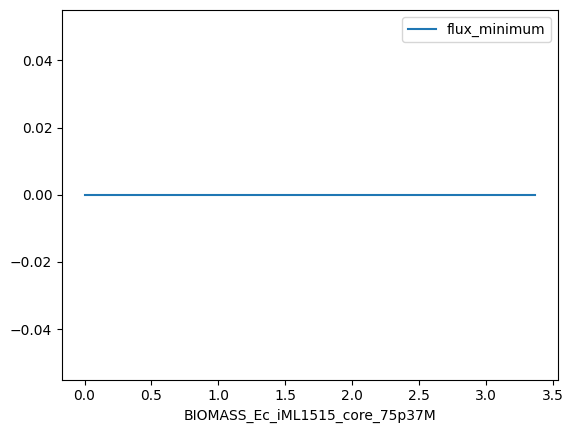

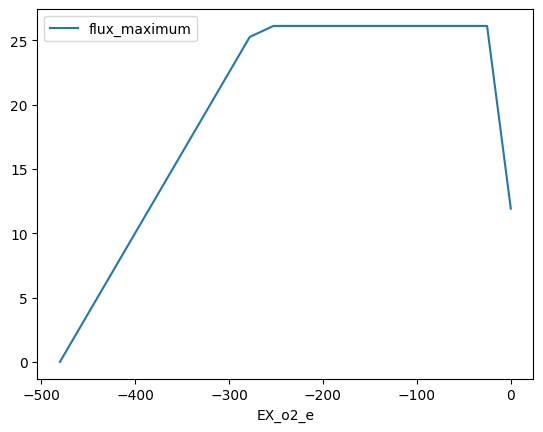

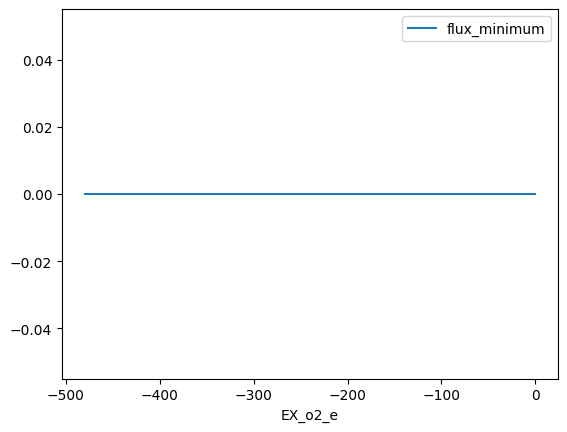

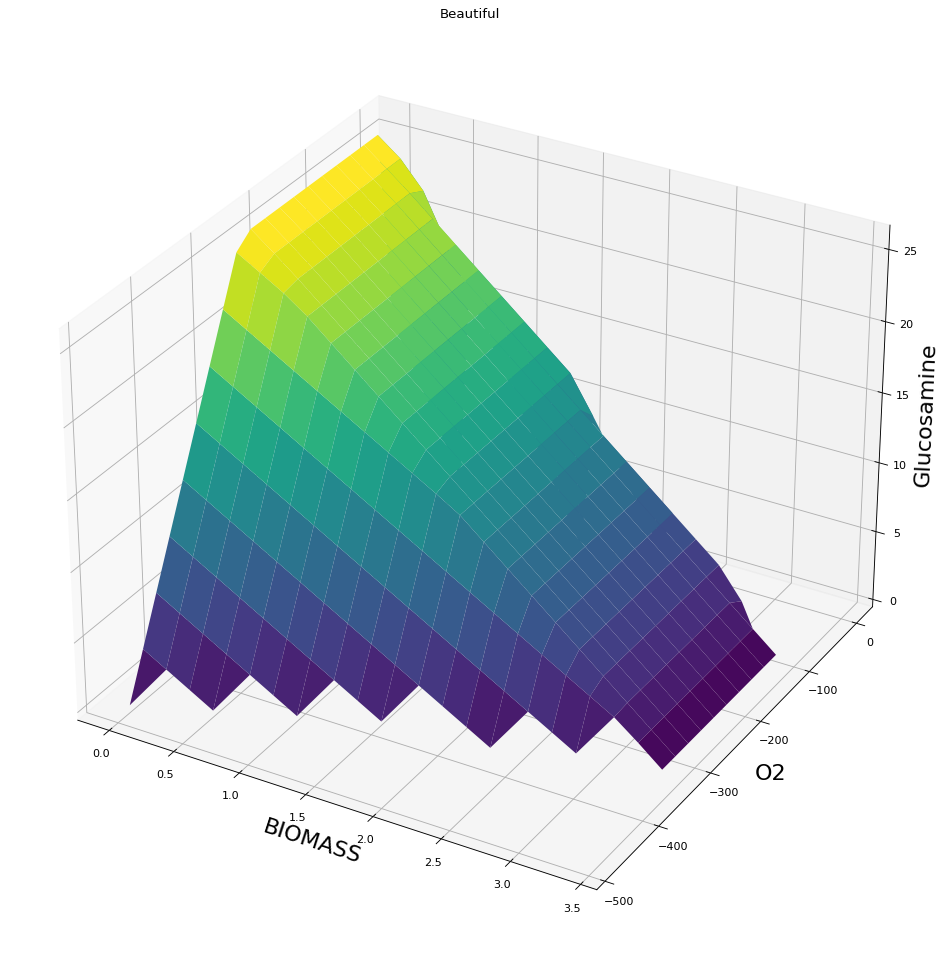

In [6]:

medium = model.medium
with model:
    # media
    medium['EX_glc__D_e'] = 30
    medium['EX_rib__D_e'] = 10
    medium['EX_chtbs_e'] = 0
    model.medium = medium
    
    # gene knockout
    model.genes.get_by_id("b0677").knock_out()
    model.genes.get_by_id("b0678").knock_out()
    model.genes.get_by_id("b0679").knock_out()
    model.genes.get_by_id("b1817").knock_out()
    model.genes.get_by_id("b1818").knock_out()
    model.genes.get_by_id("b1819").knock_out()
    model.genes.get_by_id("b1101").knock_out()
    model.genes.get_by_id("b2415").knock_out()
    model.genes.get_by_id("b2416").knock_out()
    model.genes.get_by_id("b2417").knock_out()
    
    # gene integration
    reaction = Reaction("ExRe1")
    reaction.name = "GlcNAc-6-P N-Acetyltransferase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000

    reaction.add_metabolites({
        model.metabolites.get_by_id("accoa_c"): -1.0,
        model.metabolites.get_by_id("gam6p_c"): -1.0,
        model.metabolites.get_by_id("acgam6p_c"): 1.0,
        model.metabolites.get_by_id("coa_c"): 1.0,
        model.metabolites.get_by_id("h_c"): 1.0,
    })
    model.add_reactions([reaction])
    reaction = Reaction("ExRe2")
    reaction.name = "GlcNAc-6-P phosphatase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000

    reaction.add_metabolites({
        model.metabolites.get_by_id("acgam6p_c"): -1.0,
        model.metabolites.get_by_id("h2o_p"): -1.0,
        model.metabolites.get_by_id("pi_p"): 1.0,
        model.metabolites.get_by_id("acgam_p"): 1.0
    })
    model.add_reactions([reaction])

    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.45
    model.objective = model.reactions.ExRe2
    solution = model.optimize()

    print(solution.fluxes["ExRe1"])
    print(solution.fluxes["ExRe2"])   
    print(solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])
    
    moma_res = moma(model, solution)
    print(moma_res.fluxes["ExRe1"])
    print(moma_res.fluxes["ExRe2"])   
    print(moma_res.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])
    
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0
    
    # PPP
    growth = production_envelope(model, reactions=model.reactions.BIOMASS_Ec_iML1515_core_75p37M, 
                               objective=model.reactions.ExRe2)
    growth.plot(x='BIOMASS_Ec_iML1515_core_75p37M', y='flux_maximum')
    growth.plot(x="BIOMASS_Ec_iML1515_core_75p37M", y= "flux_minimum")  
    
    oxy = production_envelope(model, reactions=model.reactions.EX_o2_e, 
                               objective=model.reactions.ExRe2)
    oxy.plot(x='EX_o2_e', y='flux_maximum')
    oxy.plot(x="EX_o2_e", y= "flux_minimum")  
    
    result_3D = production_envelope(model, reactions=[model.reactions.BIOMASS_Ec_iML1515_core_75p37M, model.reactions.EX_o2_e],
                                   objective=model.reactions.ExRe2)
    fig = plt.figure(figsize=(15, 15), dpi=80)
    ax = plt.axes(projection='3d')
    ax.plot_surface(np.reshape(np.asarray(result_3D.BIOMASS_Ec_iML1515_core_75p37M), (-1, 20)), 
                    np.reshape(np.asarray(result_3D.EX_o2_e), (-1, 20)), 
                    np.reshape(np.asarray(result_3D.flux_maximum), (-1, 20)),
                    rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_title('Beautiful')
    ax.set_xlabel('BIOMASS', fontsize=20, rotation = 0)
    ax.set_ylabel('O2', fontsize=20, rotation = 0)
    ax.set_zlabel('Glucosamine', fontsize=20, rotation = 0)

In [7]:
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
import warnings
warnings.filterwarnings('ignore')
plotter = PlotlyPlotter()
with model:
    # media
    medium['EX_glc__D_e'] = 30
    medium['EX_rib__D_e'] = 10
    medium['EX_chtbs_e'] = 0
    model.medium = medium
    
    # gene knockout
    model.genes.get_by_id("b0677").knock_out()
    model.genes.get_by_id("b0678").knock_out()
    model.genes.get_by_id("b0679").knock_out()
    model.genes.get_by_id("b1817").knock_out()
    model.genes.get_by_id("b1818").knock_out()
    model.genes.get_by_id("b1819").knock_out()
    model.genes.get_by_id("b1101").knock_out()
    model.genes.get_by_id("b2415").knock_out()
    model.genes.get_by_id("b2416").knock_out()
    model.genes.get_by_id("b2417").knock_out()
    
    # gene integration
    reaction = Reaction("ExRe1")
    reaction.name = "GlcNAc-6-P N-Acetyltransferase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000

    reaction.add_metabolites({
        model.metabolites.get_by_id("accoa_c"): -1.0,
        model.metabolites.get_by_id("gam6p_c"): -1.0,
        model.metabolites.get_by_id("acgam6p_c"): 1.0,
        model.metabolites.get_by_id("coa_c"): 1.0,
        model.metabolites.get_by_id("h_c"): 1.0,
    })
    model.add_reactions([reaction])
    reaction = Reaction("ExRe2")
    reaction.name = "GlcNAc-6-P phosphatase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000

    reaction.add_metabolites({
        model.metabolites.get_by_id("acgam6p_c"): -1.0,
        model.metabolites.get_by_id("h2o_p"): -1.0,
        model.metabolites.get_by_id("pi_p"): 1.0,
        model.metabolites.get_by_id("acgam_p"): 1.0
    })
    model.add_reactions([reaction])

    ppp = phenotypic_phase_plane(model,
                                 variables=[model.reactions.BIOMASS_Ec_iML1515_core_75p37M],
                                 objective=model.reactions.ExRe2)

    ppp.plot(plotter)

# FVA

In [8]:
from cameo import flux_variability_analysis

In [9]:
# media
medium = model.medium
medium['EX_glc__D_e'] = 30
medium['EX_rib__D_e'] = 10
model.medium = medium

model.genes.get_by_id("b0677").knock_out()
model.genes.get_by_id("b0678").knock_out()
model.genes.get_by_id("b0679").knock_out()
model.genes.get_by_id("b1817").knock_out()
model.genes.get_by_id("b1818").knock_out()
model.genes.get_by_id("b1819").knock_out()
model.genes.get_by_id("b1101").knock_out()
model.genes.get_by_id("b2415").knock_out()
model.genes.get_by_id("b2416").knock_out()
model.genes.get_by_id("b2417").knock_out()

#gene integration
reaction = Reaction("ExRe1")
reaction.name = "GlcNAc-6-P N-Acetyltransferase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
    model.metabolites.get_by_id("ac_c"): -1.0,
    model.metabolites.get_by_id("gam6p_c"): -1.0,
    model.metabolites.get_by_id("acgam6p_c"): 1.0,
    model.metabolites.get_by_id("h2o_c"): 1.0
})
model.add_reactions([reaction])
reaction = Reaction("ExRe2")
reaction.name = "GlcNAc-6-P phosphatase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
    model.metabolites.get_by_id("acgam6p_c"): -1.0,
    model.metabolites.get_by_id("pyr_c"): -1.0,
    model.metabolites.get_by_id("pep_c"): 1.0,
    model.metabolites.get_by_id("acgam_p"): 1.0
})
model.add_reactions([reaction])



In [10]:
fva_result = flux_variability_analysis(model)

In [11]:
fva_result.data_frame["diff"] = fva_result.data_frame["upper_bound"] - fva_result.data_frame["lower_bound"] 

In [12]:
fva_result.data_frame.sort_values("diff", ascending=False)

lower_bound  upper_bound    diff
FUMt1pp            -1000.0       1000.0  2000.0
SUCFUMtpp          -1000.0       1000.0  2000.0
VALTA              -1000.0       1000.0  2000.0
SUCCt1pp           -1000.0       1000.0  2000.0
NDPK1              -1000.0       1000.0  2000.0
...                    ...          ...     ...
G2PPpp                 0.0          0.0     0.0
GAL1Ptex               0.0          0.0     0.0
GALURtex               0.0          0.0     0.0
XYLUt2pp               0.0          0.0     0.0
14GLUCANabcpp          0.0          0.0     0.0

[2714 rows x 3 columns]

In [13]:
fva_result.plot(plotter, 
                #index=fva_result.data_frame.sort_values("diff", ascending=False).index[:25]
               )

In [14]:
fva_result2 = flux_variability_analysis(model,fraction_of_optimum=0.5)

In [16]:
fva_result2.plot(plotter, index=fva_result.data_frame.index[2700:2714])

## Using networkx to analyze the network

In [17]:
from cobra.util import create_stoichiometric_matrix
S = create_stoichiometric_matrix(model)

In [18]:
S

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
import numpy as np
S_hat = np.where(S==0, S, 1)
A_v = S_hat.T @ S_hat
A_x = S_hat @ S_hat.T

In [20]:
import networkx as nx

In [21]:
compound_centric_network = nx.from_numpy_matrix(A_x)

In [22]:
mapping = dict(zip(range(0, len(model.metabolites)), model.metabolites))
compound_centric_network = nx.relabel_nodes(compound_centric_network, mapping)

In [23]:
metabolite_degrees = compound_centric_network.degree()

In [24]:
sorted_metabolite_degrees = sorted(metabolite_degrees, key=lambda item: item[1], reverse=True)
sorted_metabolite_degrees[0:10]

[(<Metabolite h_c at 0x2005a46b730>, 1216),
 (<Metabolite h2o_c at 0x2005a7072b0>, 864),
 (<Metabolite atp_c at 0x2005a59a370>, 610),
 (<Metabolite pi_c at 0x2005a54e2b0>, 557),
 (<Metabolite adp_c at 0x2005a534040>, 525),
 (<Metabolite h_p at 0x2005a4e4c70>, 479),
 (<Metabolite ppi_c at 0x2005a650c40>, 302),
 (<Metabolite nad_c at 0x2005a500b80>, 298),
 (<Metabolite nadp_c at 0x2005a650dc0>, 294),
 (<Metabolite nadph_c at 0x2005a7f03d0>, 294)]

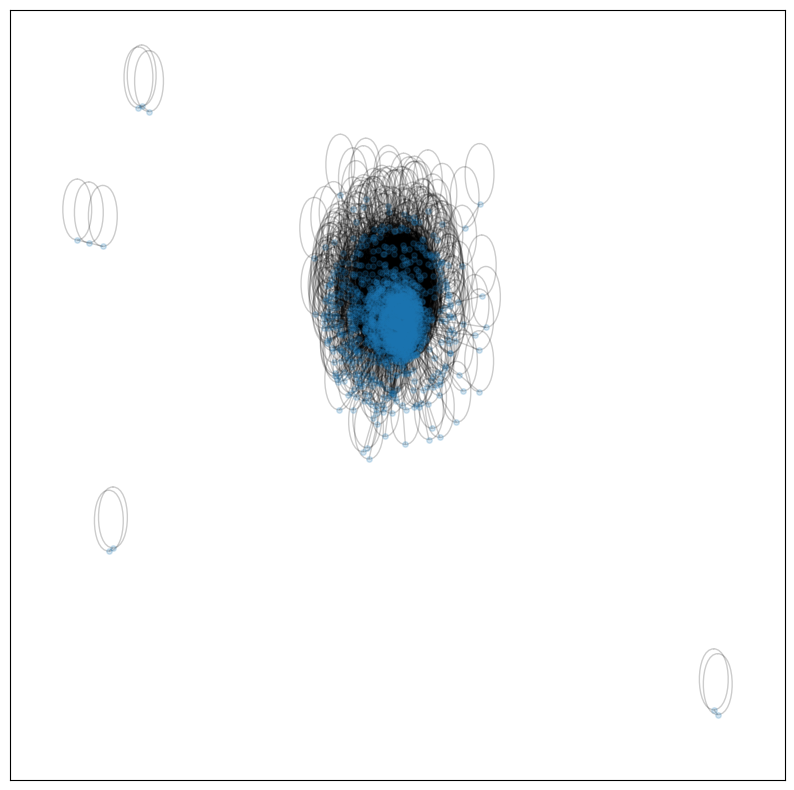

In [37]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(compound_centric_network, node_size=15, alpha=.2, with_labels=False)

In [84]:
a=list(compound_centric_network.nodes)[565]
b=list(compound_centric_network.nodes)[420]
for i in range(len(list(compound_centric_network.nodes))):
    print(i, list(compound_centric_network.nodes)[i])

0 octapb_c
1 cysi__L_e
2 dhap_c
3 prbatp_c
4 10fthf_c
5 btal_c
6 6pgg_c
7 co2_e
8 akg_e
9 gsn_e
10 pydx5p_c
11 3dhgulnp_c
12 g3ps_c
13 adphep_LD_c
14 lyx__L_c
15 din_p
16 2pg_c
17 ptrc_p
18 malt_p
19 pppn_p
20 arbtn_p
21 hphhlipa_c
22 phphhlipa_c
23 13dpg_c
24 murein3px4p_p
25 34dhpac_e
26 1odec11eg3p_c
27 12dgr181_p
28 anhgm_e
29 prbamp_c
30 dsbdrd_c
31 cu2_p
32 sla_c
33 14glucan_p
34 grdp_c
35 ribflv_p
36 dms_e
37 pgp141_c
38 cysi__L_c
39 fpram_c
40 f1p_c
41 dsbard_p
42 thr__L_c
43 dcyt_p
44 2ddglcn_c
45 fum_p
46 galctn__L_e
47 btn_e
48 pydxn_p
49 ocdcea_e
50 preq0_c
51 tyr__L_p
52 dtdp4d6dg_c
53 acmum_e
54 man_p
55 adocbl_e
56 iscu_2fe2s_c
57 frulysp_c
58 dump_p
59 novbcn_e
60 feenter_e
61 eca4und_p
62 gg4abut_c
63 flxr_c
64 pa160_c
65 lcts_c
66 arbtn_e
67 cdpdhdec9eg_c
68 aso3_c
69 progly_c
70 3ohdcoa_c
71 clpn161_p
72 1ddecg3p_p
73 gln__L_e
74 cpgn_un_e
75 ca2_p
76 tre_e
77 iscssh_c
78 glyald_c
79 alaala_e
80 novbcn_p
81 3ohexACP_c
82 g3pg_c
83 rpntp_c
84 adocbl_c
85 3ocddec5eACP_

In [85]:
print(nx.shortest_path(compound_centric_network, source=a, target=b))

[<Metabolite glc__D_c at 0x227658bfb80>, <Metabolite h_c at 0x227657e4280>, <Metabolite uacgam_c at 0x22767ad1310>, <Metabolite puacgam_c at 0x2276798a100>, <Metabolite puacgam_p at 0x22765732be0>]


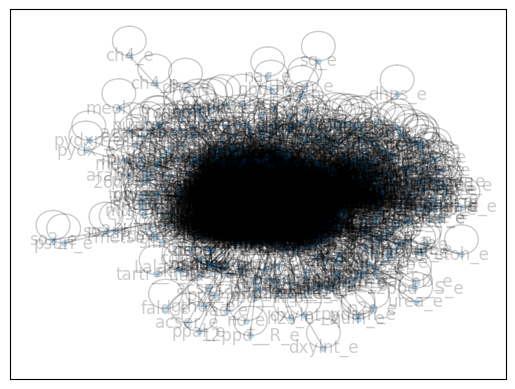

In [86]:
A = (compound_centric_network.subgraph(c) for c in nx.connected_components(compound_centric_network))
A = list(A)[0]
nx.draw_networkx(A, node_size=15, alpha=.2, with_labels=True)

In [25]:
acgam_p = list(compound_centric_network.nodes)[1607]
acgam6p_c = list(compound_centric_network.nodes)[133]
gam6p_c = list(compound_centric_network.nodes)[1443]
for i in range(len(list(compound_centric_network.nodes))):
    print(i, list(compound_centric_network.nodes)[i])

0 octapb_c
1 cysi__L_e
2 dhap_c
3 prbatp_c
4 10fthf_c
5 btal_c
6 6pgg_c
7 co2_e
8 akg_e
9 gsn_e
10 pydx5p_c
11 3dhgulnp_c
12 g3ps_c
13 adphep_LD_c
14 lyx__L_c
15 din_p
16 2pg_c
17 ptrc_p
18 malt_p
19 pppn_p
20 arbtn_p
21 hphhlipa_c
22 phphhlipa_c
23 13dpg_c
24 murein3px4p_p
25 34dhpac_e
26 1odec11eg3p_c
27 12dgr181_p
28 anhgm_e
29 prbamp_c
30 dsbdrd_c
31 cu2_p
32 sla_c
33 14glucan_p
34 grdp_c
35 ribflv_p
36 dms_e
37 pgp141_c
38 cysi__L_c
39 fpram_c
40 f1p_c
41 dsbard_p
42 thr__L_c
43 dcyt_p
44 2ddglcn_c
45 fum_p
46 galctn__L_e
47 btn_e
48 pydxn_p
49 ocdcea_e
50 preq0_c
51 tyr__L_p
52 dtdp4d6dg_c
53 acmum_e
54 man_p
55 adocbl_e
56 iscu_2fe2s_c
57 frulysp_c
58 dump_p
59 novbcn_e
60 feenter_e
61 eca4und_p
62 gg4abut_c
63 flxr_c
64 pa160_c
65 lcts_c
66 arbtn_e
67 cdpdhdec9eg_c
68 aso3_c
69 progly_c
70 3ohdcoa_c
71 clpn161_p
72 1ddecg3p_p
73 gln__L_e
74 cpgn_un_e
75 ca2_p
76 tre_e
77 iscssh_c
78 glyald_c
79 alaala_e
80 novbcn_p
81 3ohexACP_c
82 g3pg_c
83 rpntp_c
84 adocbl_c
85 3ocddec5eACP_

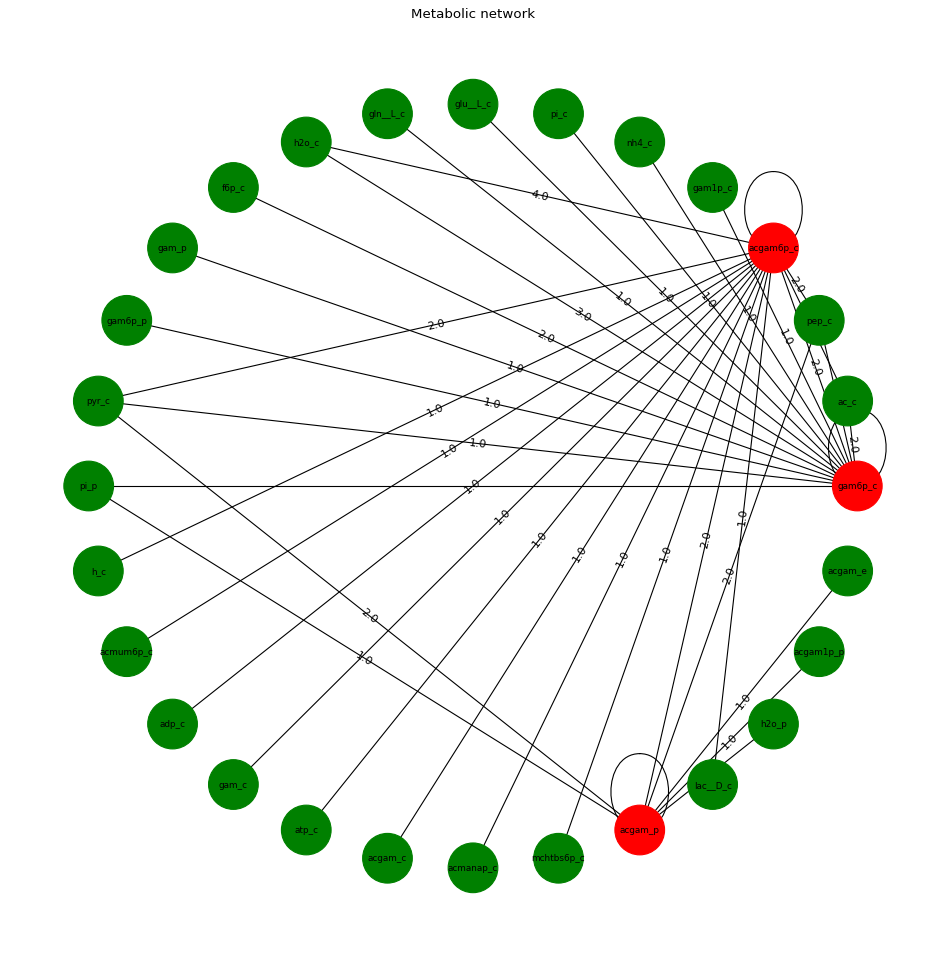

In [26]:
def check_neighbor_weights(g,nodes):
    subg=nx.Graph() #Create subgraph
    for n in nodes:
        subg.add_node(n)
        neighbors=g.neighbors(n) #Find all neighbors of node n
        for neighs in neighbors:
            if g[n][neighs]['weight']<50: #Check if the weigh t is below 50
                subg.add_edge(n,neighs,weight=g[n][neighs]['weight'])
    return subg

subg=check_neighbor_weights(compound_centric_network,[gam6p_c, acgam6p_c, acgam_p]) #Returns subgraph of interest

color_map = []
for node in subg.nodes():
    if node in [gam6p_c, acgam6p_c, acgam_p]:
        color_map.append('red')
    else: 
        color_map.append('green')      


plt.figure(figsize=(15, 15), dpi=80)
plt.title('Metabolic network')
labels_subg = nx.get_edge_attributes(subg,'weight')
pos_subg=nx.circular_layout(subg)
nx.draw_networkx_edge_labels(subg,pos=pos_subg,edge_labels=labels_subg)
nx.draw(subg,pos=pos_subg,with_labels=True,node_color=color_map,node_size=2000,font_size=8)

plt.show()

# dFBA

In [44]:
from tqdm import tqdm
from scipy.integrate import solve_ivp
import cobra

model = read_sbml_model('iML1515.xml')

In [45]:
# media
medium = model.medium
medium['EX_glc__D_e'] = 30
medium['EX_rib__D_e'] = 10
model.medium = medium

model.genes.get_by_id("b0677").knock_out()
model.genes.get_by_id("b0678").knock_out()
model.genes.get_by_id("b0679").knock_out()
model.genes.get_by_id("b1817").knock_out()
model.genes.get_by_id("b1818").knock_out()
model.genes.get_by_id("b1819").knock_out()
model.genes.get_by_id("b1101").knock_out()
model.genes.get_by_id("b2415").knock_out()
model.genes.get_by_id("b2416").knock_out()
model.genes.get_by_id("b2417").knock_out()

#gene integration
reaction = Reaction("ExRe1")
reaction.name = "GlcNAc-6-P N-Acetyltransferase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
    model.metabolites.get_by_id("ac_c"): -1.0,
    model.metabolites.get_by_id("gam6p_c"): -1.0,
    model.metabolites.get_by_id("acgam6p_c"): 1.0,
    model.metabolites.get_by_id("h2o_c"): 1.0
})
model.add_reactions([reaction])
reaction = Reaction("ExRe2")
reaction.name = "GlcNAc-6-P phosphatase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
    model.metabolites.get_by_id("acgam6p_c"): -1.0,
    model.metabolites.get_by_id("pyr_c"): -1.0,
    model.metabolites.get_by_id("pep_c"): 1.0,
    model.metabolites.get_by_id("acgam_p"): 1.0
})
model.add_reactions([reaction])

In [46]:
def add_dynamic_bounds(model, y):
    """Use external concentrations to bound the uptake flux of glucose."""
    glucosamine, glucose = y  # expand the boundary species
    glucose_max_import = -10 * glucose / (5 + glucose)
    model.reactions.EX_glc__D_e.lower_bound = glucose_max_import


def dynamic_system(t, y):
    """Calculate the time derivative of external species."""

    glucosamine, glucose = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    with model:
        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            model, ['ExRe2', 'EX_glc__D_e'], ['max', 'max'])

    # glucosamine the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    fluxes *= glucosamine

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with model:

        add_dynamic_bounds(model, y)

        cobra.util.add_lp_feasibility(model)
        feasibility = cobra.util.fix_objective_as_constraint(model)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True

In [47]:
ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
y0 = [0.1, 10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

t = 0.801: : 555it [1:28:36,  9.58s/it]


Text(0, 0.5, 'Glucose')

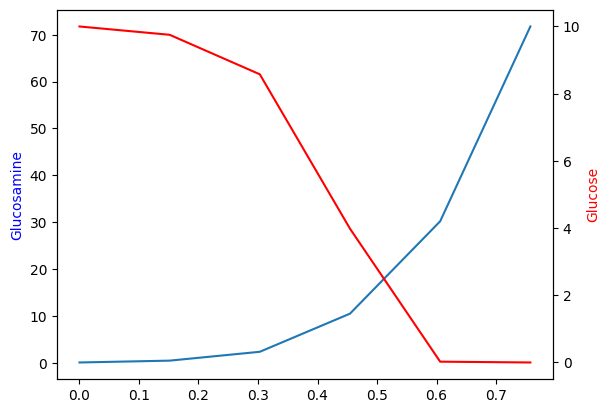

In [48]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y.T[:, 0])
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y.T[:, 1], color='r')

ax.set_ylabel('Glucosamine', color='b')
ax2.set_ylabel('Glucose', color='r')

# FSEOF

In [49]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [50]:
fseof = FSEOF(model)

In [51]:
result = fseof.run(target=model.reactions.ExRe2)

In [56]:
result.data_frame #52 reacitons

1          2          3          4          5          6   \
NDPK5     -0.080453  -0.072751  -0.065048  -0.057345  -0.049642  -0.041940   
NDPK8      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PYNP2r     0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
DURIPP    -0.080453  -0.072751  -0.065048  -0.057345  -0.049642  -0.041940   
ACALD      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PPM       -0.002069  -0.001871  -0.001673  -0.001475  -0.001277  -0.001079   
PYK       46.871184  46.870629  46.870074  46.869519  46.868963  46.868408   
PFL        0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
FRD2       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PTAr       0.674736   3.310919   5.947103   8.583286  11.219469  13.855653   
ACKr      -0.674736  -3.310919  -5.947103  -8.583286 -11.219469 -13.855653   
PGI       -8.766170  -8.384187  -8.002205  -7.620222  -7.238240  -6.856258   
PUNP1     -0.002069  -0.001871  -0.001673  -0.001475  -0.001277  -0.001079   
PUNP2      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PUNP3     -0.080453  -0.072751  -0.065048  -0.057345  -0.049642  -0.041940   
NTD2       0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
NTD6       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
XYLI2     30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
HEX7      30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
DURIK1     0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
NDPK2      1.227177   1.109685   0.992193   0.874702   0.757210   0.639718   
NDPK3      0.556535   0.503252   0.449968   0.396685   0.343401   0.290118   
DGK1      -0.080453  -0.072751  -0.065048  -0.057345  -0.049642  -0.041940   
NDPK1      2.509532   2.269266   2.029000   1.788733   1.548467   1.308201   
GSNK       0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
ACCOAL     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
PPCSCT     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
GART       0.007542   0.006820   0.006098   0.005376   0.004654   0.003932   
GF6PTA     2.755325   5.192310   7.629294  10.066279  12.503264  14.940249   
PPM2       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
SPODM      0.012004   0.010854   0.009705   0.008556   0.007407   0.006257   
FTHFLi     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
THD2pp     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
DRPA       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
TKT2       4.477690   4.520562   4.563435   4.606307   4.649179   4.692051   
GK1        0.828313   0.749010   0.669706   0.590402   0.511098   0.431794   
ASPO4      0.007004   0.006334   0.005663   0.004992   0.004322   0.003651   
ACGAtex   -2.464800  -4.929600  -7.394400  -9.859200 -12.324000 -14.788800   
GLUt2rpp  -0.016004  -0.014472  -0.012939  -0.011407  -0.009875  -0.008343   
GLUt4pp    0.016004   0.014472   0.012939   0.011407   0.009875   0.008343   
DADK       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
NTD8       0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
PUNP4      0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
GLNS       7.281230   9.284898  11.288566  13.292234  15.295902  17.299570   
ADNK1      0.002069   0.001871   0.001673   0.001475   0.001277   0.001079   
QMO3       0.007004   0.006334   0.005663   0.004992   0.004322   0.003651   
RPI        1.482064   1.826011   2.169958   2.513905   2.857852   3.201799   
POR5       0.334392   0.302377   0.270362   0.238347   0.206331   0.174316   
THRA       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
RNTR1c2    0.080453   0.072751   0.065048   0.057345   0.049642   0.041940   
RNTR2c2    0.163523   0.147867   0.1322

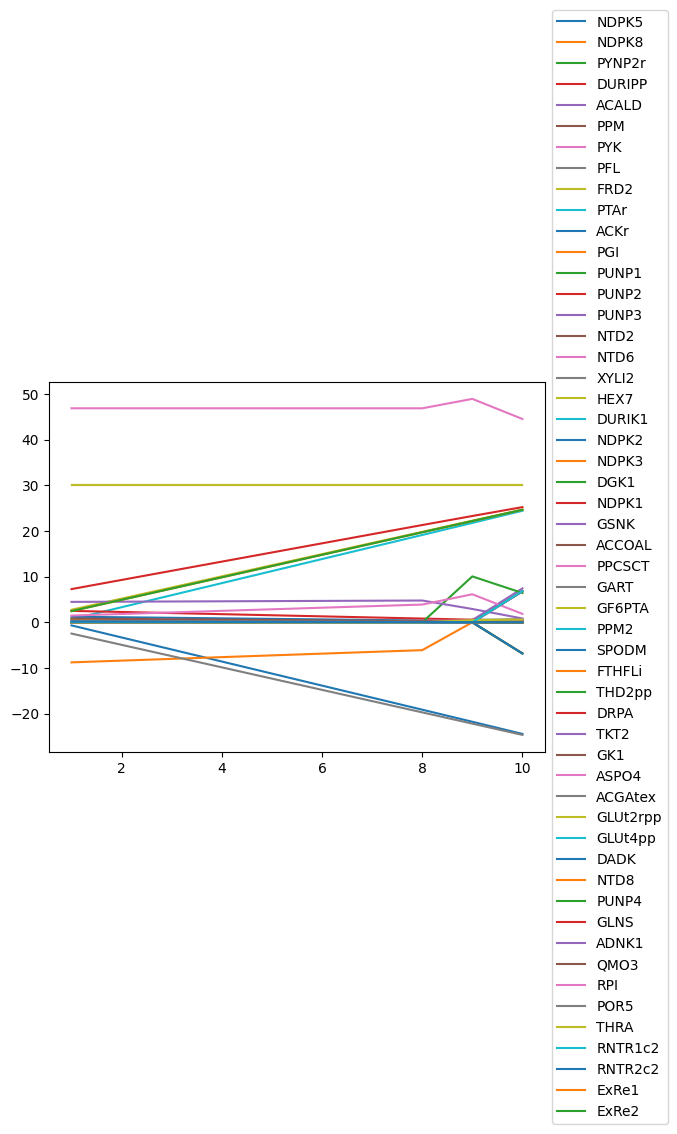

In [52]:
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# MEMOTE

In [59]:
from cobra.io import write_sbml_model
write_sbml_model(model, "iML1515_modified.xml")

In [57]:
%%time
!memote report snapshot --skip test_stoichiometric_consistency \
    --skip test_find_metabolites_not_produced_with_open_bounds \
    --skip test_find_metabolites_not_consumed_with_open_bounds iML1515.xml --filename iML1515.html

Scaling...Wall time: 3min


Writing snapshot report to 'iML1515.html'.



 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
============================= test session starts =============================
platform win32 -- Python 3.8.13, pytest-4.6.11, py-1.11.0, pluggy-1.0.0
rootdir: C:\Users\HoangPham\Documents\GitHub\27410-group-assigment-group-13-glucosamine-in-e-coli\models
plugins: anyio-3.6.1
collected 155 items / 1 skipped / 154 selected

test_annotation.py ...FFFFFFFFF.FFFFF.FFFFFFFFFFFFFFF..FF..F...F....FFF. [ 34%]
F..FF.FFF...                                                             [ 41%]
test_basic.py ......F............F.FF                                    [ 56%]
test_biomass.py ...F...F.....FF..FF                                      [ 69%]
test_consistency.py s..ssssssssssssssss.FFFFF.ssF                        [ 87%]
test_essentiality.py s                                                   [ 88%]
test_growth.py s                                                         [ 89%]
test_mat

In [60]:
%%time
!memote report snapshot --skip test_stoichiometric_consistency \
    --skip test_find_metabolites_not_produced_with_open_bounds \
    --skip test_find_metabolites_not_consumed_with_open_bounds iML1515_modified.xml --filename iML1515_modified.html

Wall time: 2min 49s
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
============================= test session starts =============================
platform win32 -- Python 3.8.13, pytest-4.6.11, py-1.11.0, pluggy-1.0.0
rootdir: C:\Users\HoangPham\Documents\GitHub\27410-group-assigment-group-13-glucosamine-in-e-coli\models
plugins: anyio-3.6.1
collected 155 items / 1 skipped / 154 selected

test_annotation.py .F.FFFFFFFFF.FFFFFFFFFFFFFFFFFFFFF..FF..F...F....FFF. [ 34%]
F..FF.FFF...                                                             [ 41%]
test_basic.py ......F............F.FF                                    [ 56%]
test_biomass.py ...F...F.....F...FF                                      [ 69%]
test_consistency.py s..ssssssssssssssss.FFFFF.ssF                        [ 87%]
test_essentiality.py s                                                   [ 88%]
test_growth.py s                                          

Writing snapshot report to 'iML1515_modified.html'.
